# Adult Dataset :
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

 * In this Dataset we have 48842 observation and 15 attributes including target attribute(income).
 * Where it have Categorical and numeric variabels in attribute.
 * Attributes with numeric values are 'age','fnlwgt', 'educational-num', 'capital-gain', 'capital-loss' and 'hours-per-week'.
 * Attributes with categorical values are 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' and 'income'.

Attribute Information/Fearures/Columns :
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

## Importing the required Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the dataframe

In [3]:
missing_val = '?'
df = pd.read_csv('adult.csv',na_values = missing_val)

 *  We can see that missing values are present in the form of "?" in "workclass","occupation", "native-country" so we are replacing it with NaN (not a null) for identifying them as missing value for further analysis.

## Viewing the dataset 

### Pandas Head : 
*     This function returns the first 5 rows from the Dataframe.

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Pandas Tail : 
*     This function returns last 5 rows from Dataframe.

In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Pandas Shape :
*     Returns tuple of shape (Rows, columns) of Dataframe.


In [6]:
df.shape

(48842, 15)

* **There are 48842 instances(Rows) and 15 attributes(columns) in the dataset.**

### Pandas info : 
*     This function is used to get a concise summary of the dataframe.

### Information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Observation :
* In above using 'info' function we found that there is missing values in Dataset which was represented by '?' and in starting when loading the data set we converted the value '?' to null value ('NaN').
* And this info function states data type of each columns it has. In this Dataset there is only 2 data type i.e. int and object.

In [8]:
df.drop('fnlwgt',axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
### While Loading the dataset we passed following missing_values, so that we don't have to reload the CSV 'using na_values'.
# missing_val = '?'
# df = pd.read_csv('adult.csv',na_values = missing_val)

## Identifying Missing Value :
*     df.isnull() - It returns True if values are missing

### Columns with atleast one missing value :

In [10]:
df.isnull().any(axis=0)

age                False
workclass           True
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

### Observation :
* In above we can say there are 3 columns contain missing values i.e., 'workclass', 'occupation', 'native-country'.  In this where the data contain missing values has been shown using True and reset that doesn't contain missing values are represented as False.

### Identifying missing values in columns : 

In [11]:
df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Observation :
* In above we can say that in 'workclass' there are 2799 missing values followed by 'occupation' having missing values 2809 and 'native-country' having missing values 857.

In [12]:
df.loc[df['workclass'].isnull()==True,['workclass','occupation','native-country']]

,workclass,occupation,native-country
4,NaN,NaN,United-States
6,NaN,NaN,United-States
13,NaN,NaN,United-States
22,NaN,NaN,United-States
35,NaN,NaN,United-States
...,...,...,...
48811,NaN,NaN,United-States
48812,NaN,NaN,United-States
48820,NaN,NaN,United-States
48822,NaN,NaN,United-States


### Observation of pattern towards the missing value :
* We can see that the Workclass and occupation having the missing value of the Individuals who are from United sates.
* And the occupation have missing value where the workclass is empty.

## Treating Missing values in Dataset : 

###  Percentage of rows that were removed while handling missing values : 

In [13]:
le = round((1-(len(df.dropna())/len(df)))*100,2)
print('The Percentage of Rows that were removed while handling missing values : {0} %'.format(le))

The Percentage of Rows that were removed while handling missing values : 7.41 %


* **The data contains a good blend of categorical, numerical and missing values.**

### Pandas Dropna function : 
* Using the dropna function from pandas we are removing all the missing values by removing the rows where missing values occur.

In [14]:
df.dropna(inplace = True)

In [15]:
male = (df[df.gender == "Male"].gender.value_counts().values[0]/df.shape[0])*100
female = (df[df.gender == "Female"].gender.value_counts().values[0]/df.shape[0])*100
print('Percentage of Male is : %d %%' % round(male))
print('Percentage of Female is : %d %%' % round(female))

Percentage of Male is : 68 %
Percentage of Female is : 32 %


### Observation :
* We can look through the above analysis and state that there are 68% of Male Individuals and 32% of Female Individuals.

### Pandas Describe : 
* Generate descriptive statistics.

In [16]:
df.describe(include='number')

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Observation for numeric attribute :
 * In this data of attributes 'age','educational-num','capital-gain','capital-loss' and 'hours-per-week' is continuous.
 
#### - Age :-
* This attribute has Age of an individual.
* The mean value is 38. Age is having the standerd deviation 13.71.
* The value of Age attribute varies from 17 to 90.

#### - Educational-num :-
* This attribute has Individual's year of receiving education.
* The mean value is 10 and median is 10.

#### - Capital-gain :-
* For capital-gain, the mean is 1101.43 and median is 0, which indicates that the distribution is highly right skewed.
* In the attribute capital-gain shows that either a person has no gain/profit or has gain of very large amount.

#### - Capital-loss :-
* This attribute is similar to the capital-gain i.e. either a person has no loss or has loss with very large amount.
* The Mean is 88 but median is 0.

#### - Hours-per-week :-
* This attribute means number of working hours spend by an individual in a week.
* This data the hours-per-week atrribute varies within the range of 1 to 99.

In [17]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### Observation for categorical attribute :
* In this the data of attributes 'workclass','education','marital-status','occupation','relationship','race','gender','native-country' is categorical.

#### - Workclass :-
* In this attributes shows the Individual work category.
* The top category in workclass is 'Private' and the Frequency of 'Private' is 33307.
* There are 7 unique categories present in the workclass attribute.

#### - Education :-
* The attribute 'education' shows the Individual's highest education degree.
* The top category in education is 'HS-grad' and the Frequency of 'HS-grad' is 14783.
* There are 16 unique categories present in the workclass attribute.

#### - Marital-status :-
* The attribute 'marital-status' shows the Individual marital status.
* The top category in marital-status is 'Married-civ-spouse' and the Frequency of 'Married-civ-spouse' is 21055.
* There are 7 unique categories present in the marital-status attribute.

#### - Occupation :-
* The attribute 'occupation' shows the Individual's occupation.
* The top category in occupation is 'Craft-repair' and the Frequency of 'Craft-repair' is 6020.
* There are 17 unique categories present in the occupation attribute.

#### - Relationship :-
* The attribute 'relationship' shows the Individual's relation in a family.
* The top category in relationship is 'Husband' and the Frequency of 'Husband' is 18666.
* There are 6 unique categories present in the relationship attribute.

#### - Race :-
* The attribute 'race' shows the Race of Individual.
* The top category in race is 'White' and the Frequency of 'White' is 38903.
* There are 5 unique categories present in the race attribute.

#### - Gender :-
* The top category in gender is 'Male' and the Frequency of 'Male' is 30527.
* There are 2 unique categories present in the gender attribute.

#### - Native-country :-
* The attribute 'native-country' shows the Individual's native country.
* The top category in native-country is 'United-States' and the Frequency of 'United-States' is 41292.
* There are 41 unique categories present in the native-country attribute.

# Data Visualization Analysis  : 

### Distribution of features

##       (A.) Univariate Analysis  :

## -- CountPlot : 

* In Countplot for each categorial variable, Y-axis represent  the no. of counts each type in variable , and X-axis represent the Type in variables.


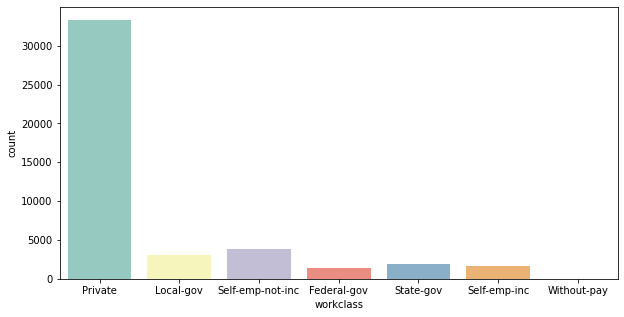

In [18]:
### Workclass
plt.figure(figsize=(10,5))
sb.countplot(df['workclass'],palette="Set3")
plt.show()

### Observation :
* Through this Countplot, we can state that more no. of Individual are mainly in Private work category. Then Self employee, etc.
* There are 7 unique categories present in the workclass attribute.

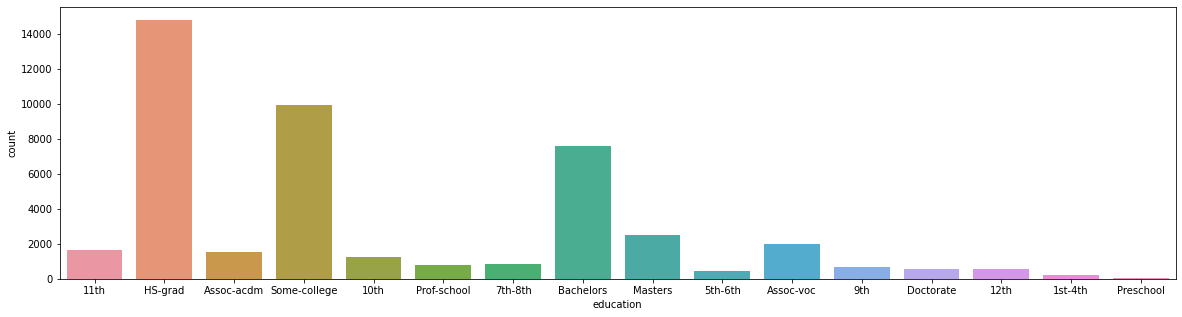

In [19]:
### Education 
plt.figure(figsize=(20,5))
sb.countplot(df['education'])
plt.show()

### Observation :
* Through this Countplot, we can state that the Individual's highest education degree is HS-grad which is most of them (Individual's) got followed by others  Degree like Some-college, Bachelors, etc.
* There are 16 unique categories present in the education attribute.

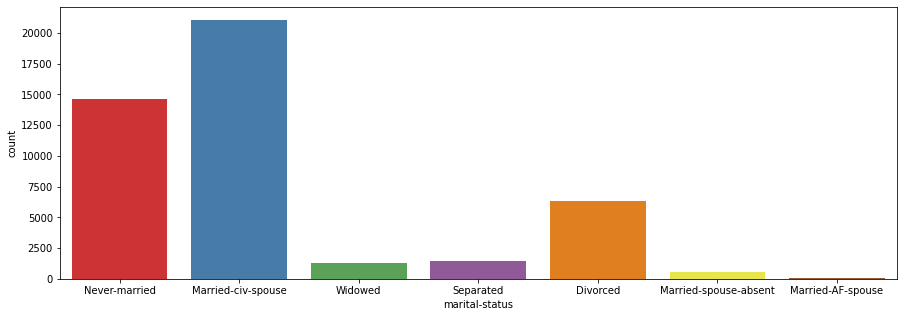

In [20]:
### marital-status
plt.figure(figsize=(15,5))
sb.countplot(df['marital-status'],palette="Set1")
plt.show()

### Observation :
* Through this graph we state that for Individual marital status, the Married-civ-spouse are more than others which is followes by those Never married, Divorced marital, etc.
* There are maximum number of observation in Married-civ-spouse.
* There are minimum  number of observation in Married-AF-spouse.
* This marital-status attribute has 7 unique categories.

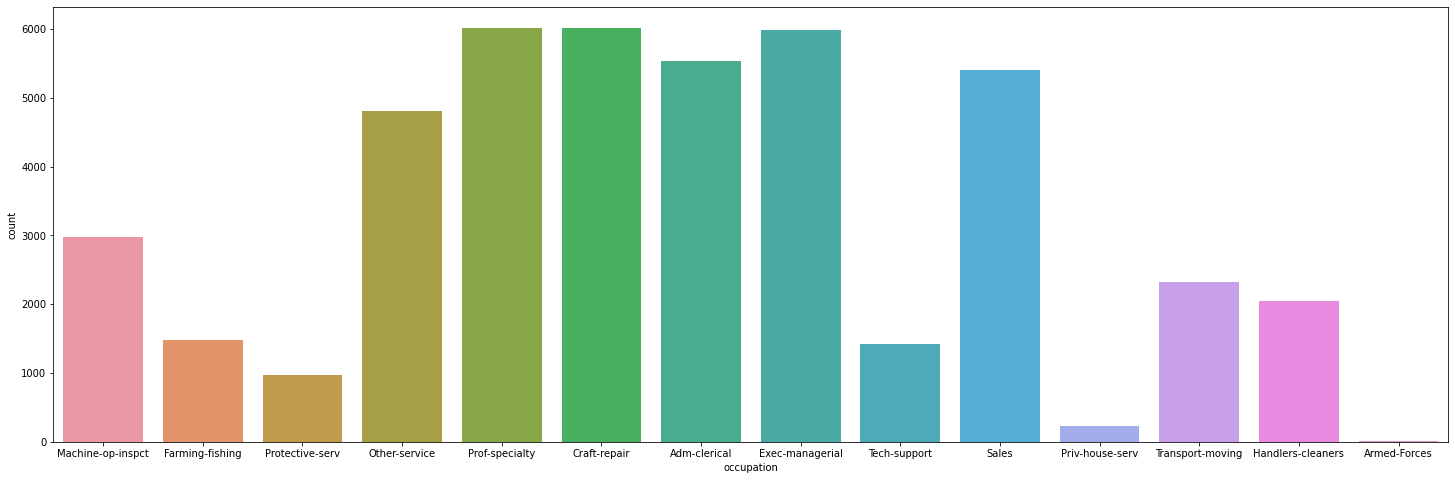

In [21]:
### Occupation
plt.figure(figsize=(25,8))
sb.countplot(df['occupation'])
plt.show()

### Observation :
* Through this Countplot we can state that the occupation of Individual's are more in Prof. specialty, then followed by Craft repair, Adm clerical and rest other occupations.
* Or we can say 'Prof-specialty' has the maximum samples in the occupation attribute and on the other hand 'Armed-Forces' has minimum samples in the occupation attribute.
* There are 14 unique categories present in the occupation attribute.

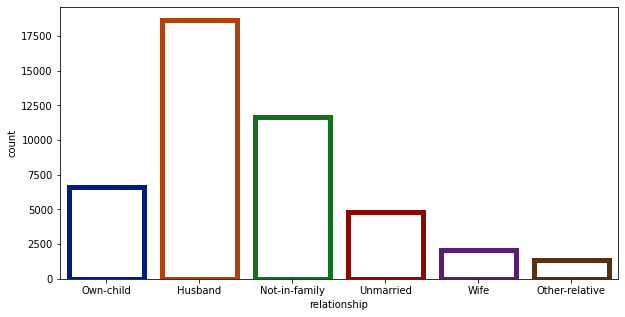

In [22]:
### Relationship
plt.figure(figsize=(10,5))
sb.countplot(df['relationship'], facecolor=(0, 0, 0, 0), linewidth=5,edgecolor=sb.color_palette("dark", 6))
plt.show()

### Observation :
* Through this Countplot we can state that the Individual's relation in a family are more with Husband, and then followed by that have no relationship with family and other relationships.
* There are 6 unique categories in the relationship attribute.

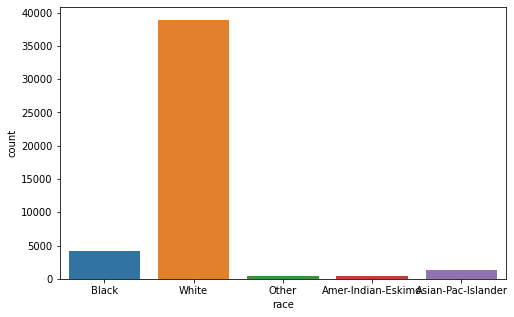

In [23]:
### Race
plt.figure(figsize=(8,5))
sb.countplot(df['race'])
plt.show()

### Observation :
* Through this Countplot, we can state that in Race of Individual there are more White person, then others. 
* There are 5 unique categories in the race attribute.

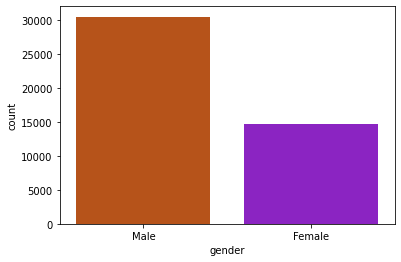

In [24]:
### Gender
sb.countplot(df['gender'],palette="gnuplot_r")
plt.show()

### Observation :
* Through this Countplot we can say there is more Male Individual's then Female. We can also go above where we analyzed that there are 67% of Male and 33% of Female.
* Gender has 2 unique categories Male and Female .

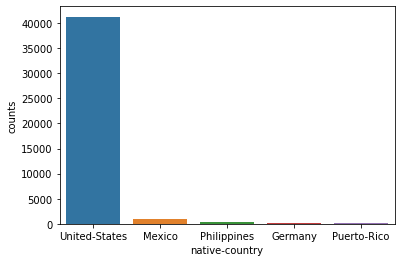

In [25]:
### Native Country
plt.ylabel('counts')
plt.xlabel('native-country')
sb.barplot(df['native-country'].value_counts().index[:5] , df['native-country'].value_counts().values[:5])
plt.show()

In [26]:
df['native-country'].value_counts().head()

United-States    41292
Mexico             903
Philippines        283
Germany            193
Puerto-Rico        175
Name: native-country, dtype: int64

### Observation :
* Through this graph we can state that  Individual's native country are more United States(41292). And this also can be seen through the above analysis where mostly Individual's native country is United States.
* There are 41 unique categories present in the 'native-country' attribute. But due to alot of variable we have taken 5 varaibles to show in Countplot.

## -- Pie chart  :

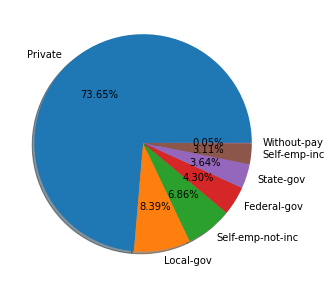

In [27]:
### workclass 
plt.figure(figsize=(10,5))
plt.pie(df["workclass"].value_counts(),autopct='%.2f%%', shadow=True,labels=df.workclass.unique())
plt.show()

### Observation :
* Through this Percentage distrubution of Workclass, we can state that 73.65% of Individual's or Majority of Individual's work in Private sector. 

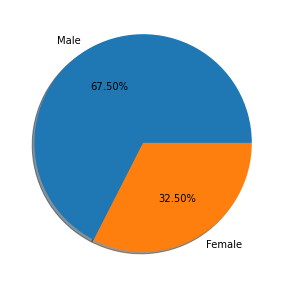

In [28]:
### Gender
plt.figure(figsize=(10,5))
plt.pie(df["gender"].value_counts(),autopct='%.2f%%', shadow=True,labels=df.gender.unique())
plt.show()

### Observation :
* Through this Piechart for Percentage distribution of Gender we can state that 67.50% of Individual's are Male and 32.50% of Individual's are Female. 

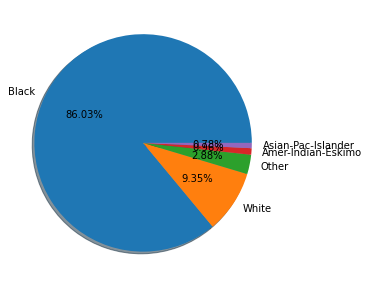

In [29]:
### Race
plt.figure(figsize=(10,5))
plt.pie(df["race"].value_counts(),autopct='%.2f%%', shadow=True,labels=df.race.unique())
plt.show()

### Observation :
* Through this Percentage distrubution for Race, we can state that 86.03% are Black. 

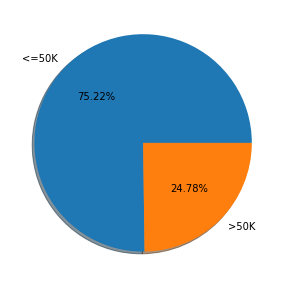

In [30]:
### income
plt.figure(figsize=(10,5))
plt.pie(df["income"].value_counts(),autopct='%.2f%%', shadow=True,labels=df.income.unique())
plt.show()

### Observation :
* In this the chart we can say 75.22% of them are belong to income group who earns less than 50k and 24.78% fall under the income group who earns more than 50k.

# -- Histogram :

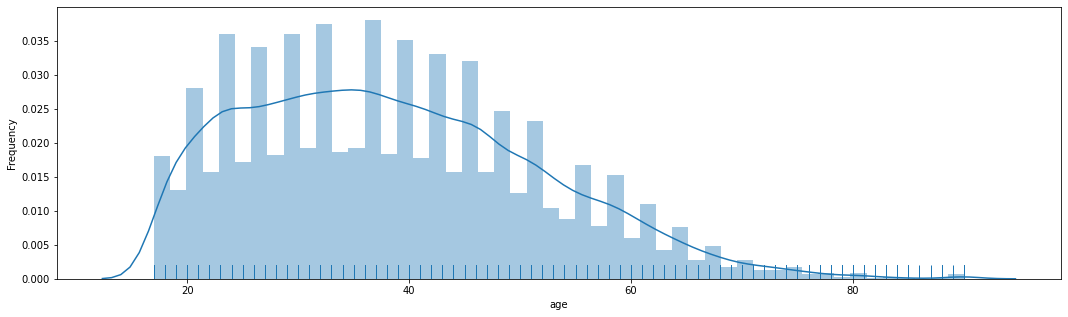

In [31]:
### Age
plt.figure(figsize=(18,5))
plt.ylabel('Frequency')
plt.xlabel('Age')
sb.distplot(df['age'], rug=True)
plt.show()

### Observation :
* "age" attribute is not symmetric.
*  Above graph is right-skewed.
* Minimum and Maximum age of the people is 17 and 90 respectively.
* Through this Histogram we can say that Age of an Individual is more in between 22 and 38. And maximum age is approx. 36 or 37. And the Frequency of Age is more at Age of approx. 37 .

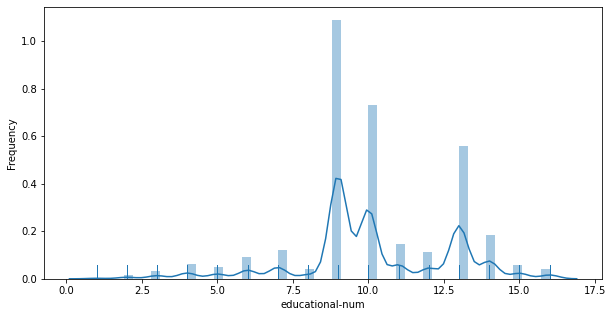

In [32]:
### Educational-num : Number of Education Year
plt.figure(figsize=(10,5))
plt.ylabel('Frequency')
plt.xlabel('Education-num')
sb.distplot(df['educational-num'], rug=True)
plt.show()

### Observation : 
* Through this graph we can state that the Individual's year of receiving education is more in 9th. And the frequency is greater in year of 9th.

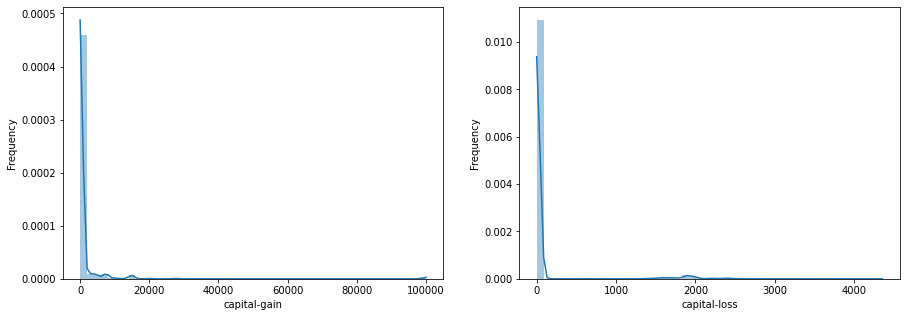

In [33]:
### Capital Gain
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.ylabel('Frequency')
plt.xlabel('capital-gain')
sb.distplot(df['capital-gain'], kde_kws={'bw':0.1})
plt.subplot(122)
plt.ylabel('Frequency')
plt.xlabel('capital-loss')
sb.distplot(df['capital-loss'],kde_kws={'bw':0.1})
plt.show()

### Observation:
* Through this 1st graph we can state that there are many Individuals with no Captial gain or profit.
* 'capital-gain' shows that either a person has no gain or has gain of very large amount
* 2nd Histogram we can say that for most of the Individuals there is no financial loss/captial loss.

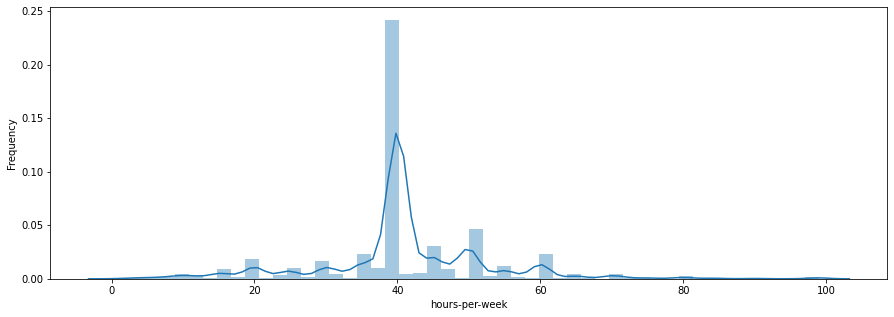

In [34]:
### Hours per week 
plt.figure(figsize=(15,5))
plt.ylabel('Frequency')
plt.xlabel('hours-per-week')
sb.distplot(df['hours-per-week'])
plt.show()

### Observation :
* In this data the hours per week atrribute varies within the range of 1 to 99.
* Through this plot we can state that more Individual's working around 40 hour per week. And Highest hours per week is 40 hrs/week.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

# -- Boxplot : 

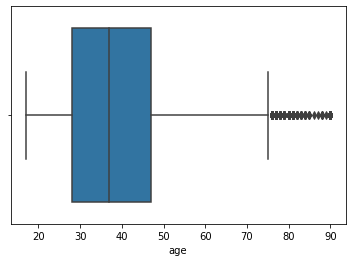

In [35]:
### Age
sb.boxplot(df['age'])
plt.show()

### Observation:
* Through this Boxplot we can say that the median of 'age' is 37. In Age plot after Highest obeservation (78) there are some outliers between age of 78 and 90. Range is 20.

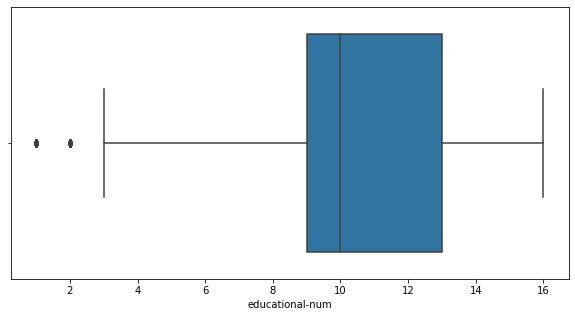

In [36]:
### Educational num
plt.figure(figsize=(10,5))
sb.boxplot(df['educational-num'])
plt.show()

### Observation :
* The majority of density of Education is lie between 5 and 16 . 
* There are less Outliers.

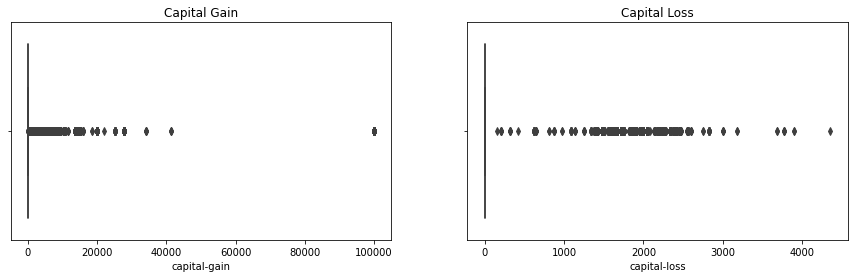

In [37]:
### Capital Gain
plt.figure(figsize=(15, 4))
plt.subplot(121)
sb.boxplot(df['capital-gain'])
plt.title('Capital Gain')
plt.subplot(122)
sb.boxplot(df['capital-loss'])
plt.title('Capital Loss')
plt.show()

### Observation :
* Through this Boxplot we can say there is less no. of Individuals those who are getting Profit or Loss.
* There is Majority of Outliers.
* Through this we can also state that both capital gain and capital loss can be zero.

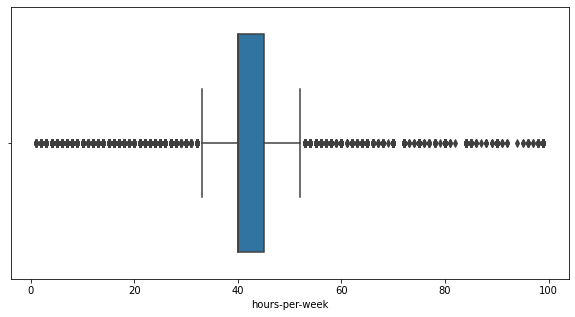

In [38]:
### Hours Per Week
plt.figure(figsize=(10,5))
sb.boxplot(df['hours-per-week'])
plt.show()


### Observation :
* Through this Boxplot we can state that most of Individuals work between 35 - 55 hours per week.

### -- PDF (Probability Distribution Function) : 

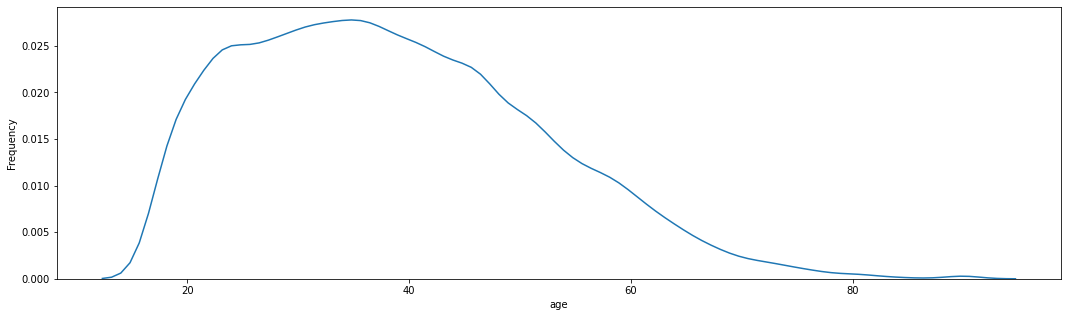

In [39]:
### Age
plt.figure(figsize=(18,5))
plt.ylabel('Frequency')
plt.xlabel('Age')
sb.distplot(df['age'],hist = False,kde=True)
plt.show()

### Observation :
* Through this P. dist. graph the results say that "age" attribute is not symmetric.
* Minimum and Maximum age of the people is 17 and 90 respectively.

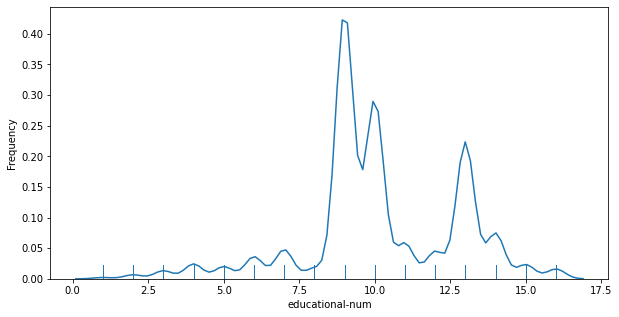

In [40]:
### Educational-num : Number of Education Year
plt.figure(figsize=(10,5))
plt.ylabel('Frequency')
plt.xlabel('Education-num')
sb.distplot(df['educational-num'], hist=False, rug=True)
plt.show()

### Observation:
* Through this distplot we can state highest frequency is between individual's year of receiving education is between 8-9 .

##       (B.) Bivariate Analysis  :

## -- Scatter Plot :

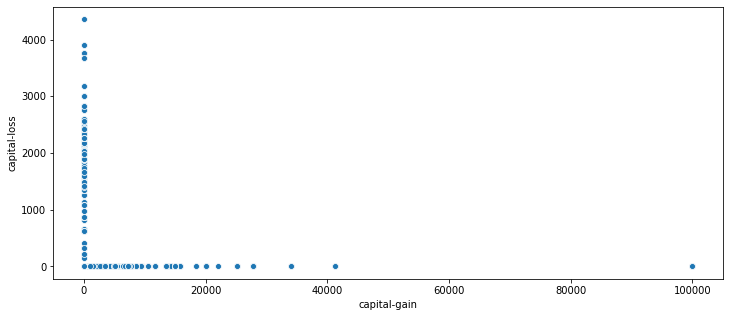

In [41]:
### Between Capital Gain and Capital Loss
plt.figure(figsize=(12,5))
sb.scatterplot(x = df['capital-gain'], y = df['capital-loss'])
plt.show()

### Observation :
* Through this graph we can state that Both capital gain and capital loss can be zero.
* We can also conclude through above analysis that has been done that, If Capital Gain is zero there is possibility of capital loss being high or above zero vise-versa; if Capital Loss is zero there is possibility of Capital gain being above zero or high.


## -- Hexbin plot : 

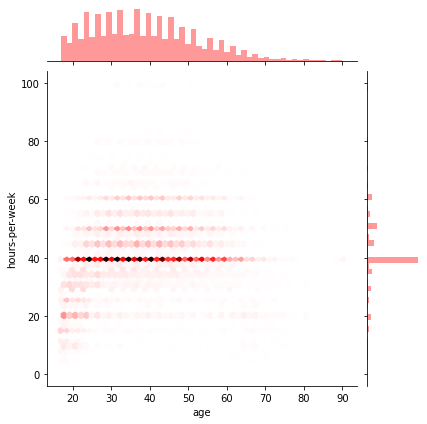

In [42]:
sb.jointplot(x='age', y='hours-per-week',kind= 'hex', data=df, color='r')
plt.show()

### Observation :
* Through this plot we can state the density is mainly between 40 - 60 hours per week where the age density is between 20 to 65 year of age.

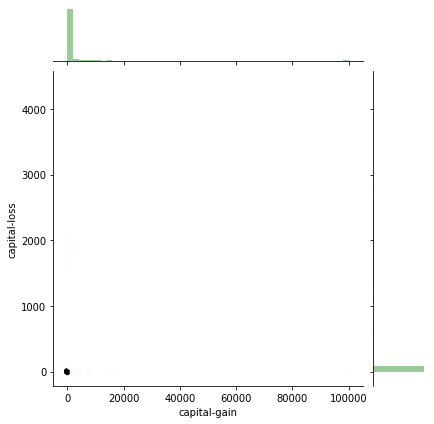

In [43]:
sb.jointplot(x='capital-gain', y='capital-loss', data=df, kind='hex', color='g')
plt.show()

### Observation:
* Through this plot we can say mainly of density lie at point 0 .

## -- Boxplot :

In [44]:
df.groupby(['income']).mean()

,age,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,36.749427,9.630770,149.023402,54.032428,39.372023
>50K,44.006067,11.598501,3991.791667,193.487063,45.690489


In [45]:
df.groupby(['income']).median()

,age,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,
<=50K,34,9,0,0,40
>50K,43,12,0,0,40


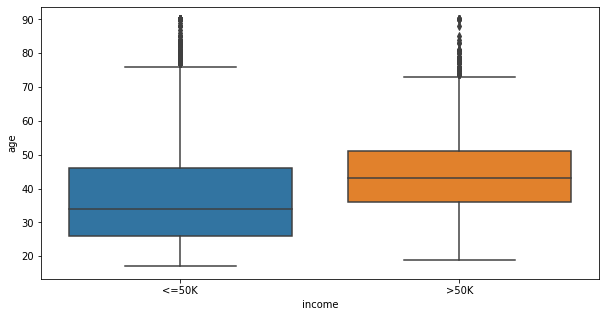

In [46]:
### Age (Relationship with income)
fig = plt.figure(figsize=(10,5)) 
sb.boxplot(x="income", y="age", data=df)
plt.show()

### Observation :
* Through this bivarite analysis between Age and income we can say the income group(<=50k) has median of age 34 year which lower than the income group(>50k) which has median of age 43 year .
* Outliers present in both the income group w.r.t. "age" attribute.
* For income group(<=50k) Interquartile range (IQR) is between 25 & 46 . And on the other hand for income group(>50k) the IQR is between 38 & 50 .

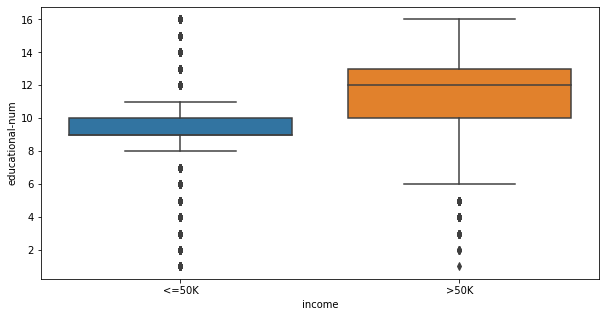

In [47]:
### educational-num (Relationship with income)
fig = plt.figure(figsize=(10,5)) 
sb.boxplot(x="income", y="educational-num", data=df)
plt.show()

### Observation :
* Through this analysis between educational-num and income we can say the income group(<=50k) has median of 9 year i.e. year of receiving education which lower than the income group(>50k) which has median of 12 year of receiving education.
* Outliers present in both the income group w.r.t. "educational-num" attribute, where we can say the income group(<=) has more outliers than group (>50k).
* For income group(<=50k) Interquartile range (IQR) is between 9 & 10 . And on the other hand for income group(>50k) the IQR is between 10 & 13 .

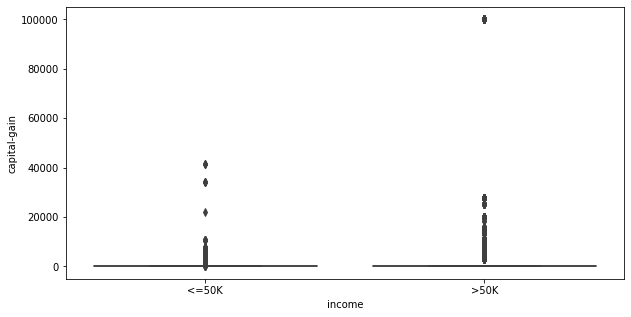

In [48]:
### Captial Gain (Relationship with income)
fig = plt.figure(figsize=(10,5)) 
sb.boxplot(x="income", y="capital-gain", data=df)
plt.show()

### Observation :
* Through this plot we can state that most of the capital gains value is accumulated at 0 for both the income group (<=50k and >50k) .
* Both income group have Outliers w.r.t. to 'captial-gain' attribute.

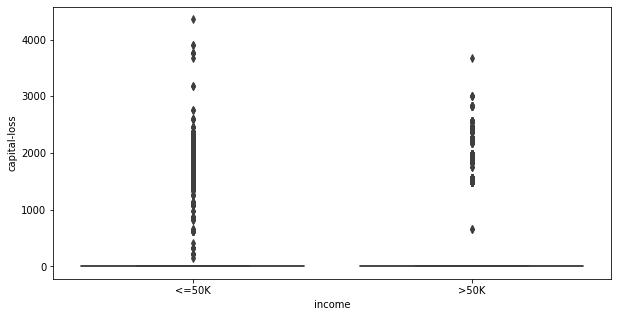

In [49]:
### Captial Loss (Relationship with income)
fig = plt.figure(figsize=(10,5)) 
sb.boxplot(x="income", y="capital-loss", data=df)
plt.show()

### Observation :
* Through above analys we can say this boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.
* Both income group have Outliers w.r.t. to 'captial-loss' attribute.

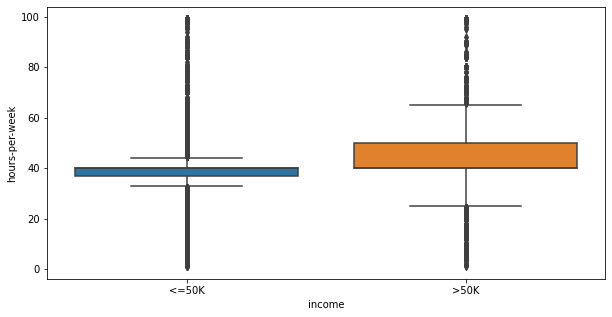

In [50]:
### Hours per Week (Relationship with income)
fig = plt.figure(figsize=(10,5)) 
sb.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

### Observation:
* Through this bivarite analysis between  and income we can say the Median of "hours-per-week" for income group who earns >50k is greater than the income group who earns <=50k.
* Outliers present in both the income group w.r.t. "age" attribute. But more Outliers present in the income group who earns <=50k.
* For those income group who earns >50k has spend approx 45 hours per week than for those income group who earns <=50k has spend approx 38 hours per week.
* It means that hours per week has some contribution to the distinguish income groups.

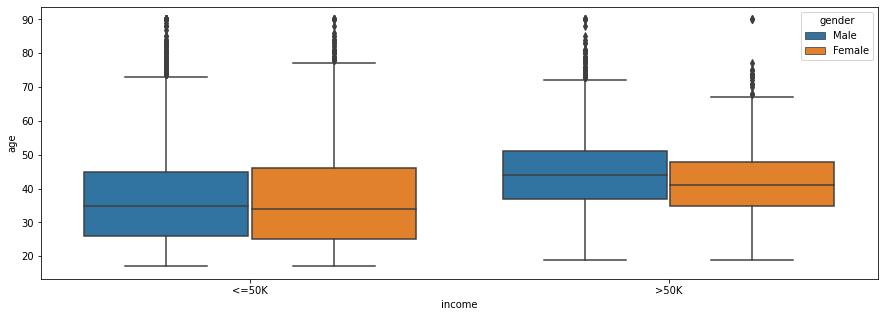

In [51]:
plt.figure(figsize=(15,5))
sb.boxplot(x="income", y="age",hue="gender",data=df)
plt.show()

### Observation :
* Through this Boxplot we can say more age of Indivials earns more than 50K. and more female under less range of age earns less than 50K.
* There are  many Outliers in both the income group in upper end.
* There is a relationship between gender and income.


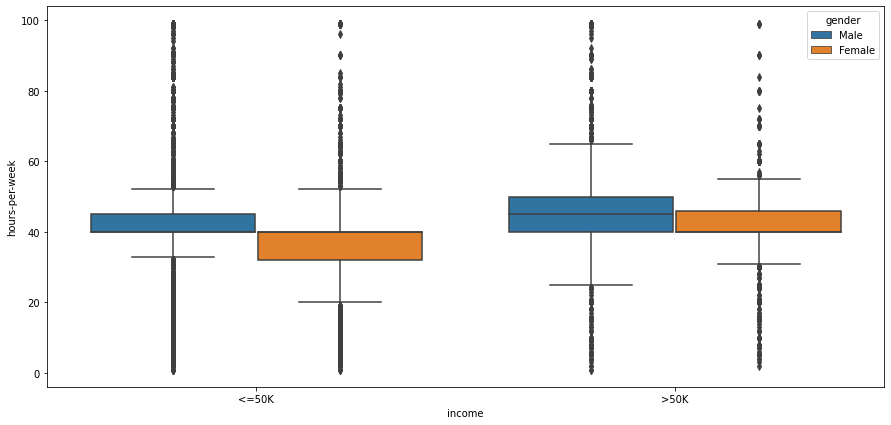

In [52]:
plt.figure(figsize=(15,7))
sb.boxplot(x="income", y="hours-per-week",hue="gender",data=df)
plt.show()

### Observation :
* Through this Boxplot we can conclude that mostly Male gender works  most of the hours per week than female. Then Individual's who working more hours per week earning mostly.
* We can see the outliers in both the ends.

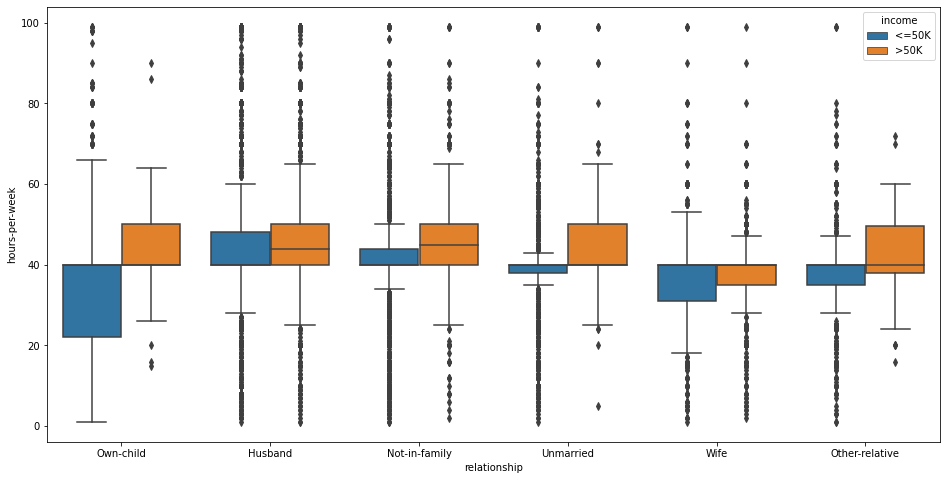

In [53]:
plt.subplots(figsize=(16, 8))  
sb.boxplot(x='relationship', y='hours-per-week', hue='income', data=df)  
plt.show() 

### Observation :
* From the above Boxplot we got some interesting results i.e., Individual with the some relationship status and with income group >50K (more than 50k) often work for more hours per week.
*  We can see the outliers in the data. Individuals with relationship status ‘Not-in-family’ and income group <=50k have a large number of outliers at both the ends.

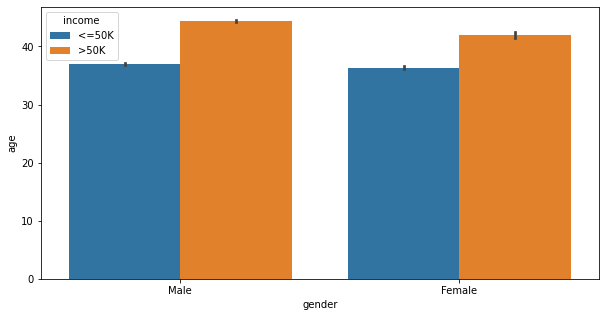

In [54]:
plt.figure(figsize=(10,5))
sb.barplot(x="gender", y="age", hue="income", data=df)
plt.show()

### Observation :
* Through this barplot we can say that in both group of gender (Male and Female) the Individual come under 

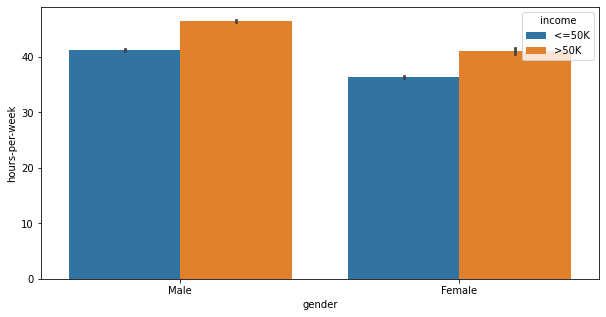

In [55]:
plt.figure(figsize=(10,5))
sb.barplot(x="gender", y="hours-per-week", hue="income", data=df)
plt.show()

### Observation :
* We can observe through above barplot that Males have more flexible working hours per week in the income groups who earns >50k. 

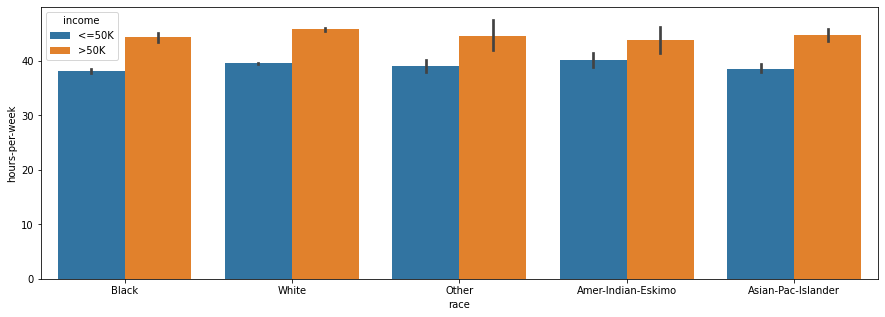

In [56]:
plt.figure(figsize=(15,5))
sb.barplot(x="race", y="hours-per-week", hue="income", data=df)
plt.show()

### Observation :
* White people are earning more income and working most of the hours per week.

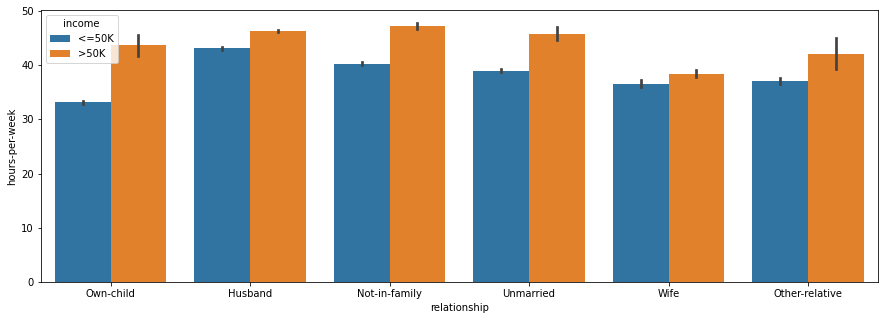

In [57]:
plt.figure(figsize=(15,5))
sb.barplot(x="relationship", y="hours-per-week", hue="income", data=df)
plt.show()

### Observation : 
* We can observe from above barplot that Individual's having the relationship with husband earns more income.

## -- Pairplot :

<Figure size 1800x504 with 0 Axes>

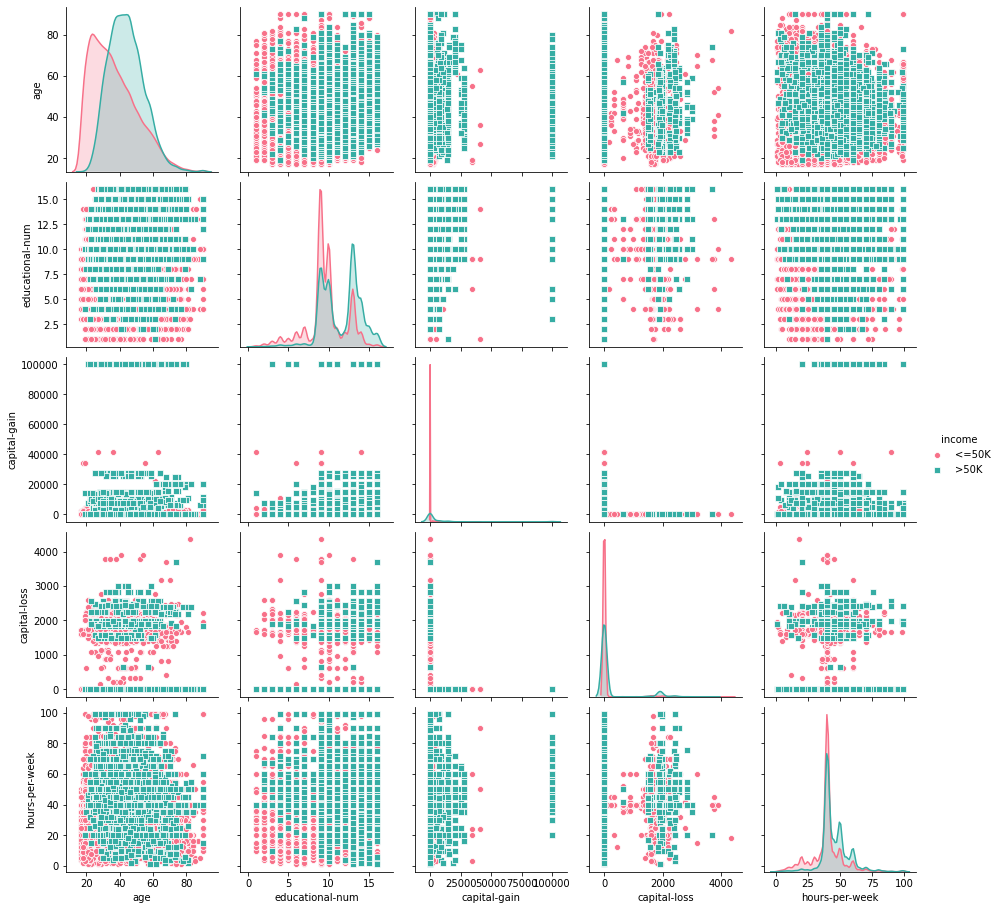

In [58]:
plt.figure(figsize=(25,7))
sb.pairplot(df,hue='income',palette="husl",markers=["o", "s"])
plt.show()

## Observation
 * The Individual of Age between ~18 to ~70 works most of the hours per week get the more paid income i.e. greater than 50.
 * We can also state that from Age attribute that most of the people earns greater than 50k.
 * Income group who earns >50k have flexible working hours.
 * Individual's having captial gain/profit or no profit earns grater than 50k, whereas Individual's having captial loss or no   loss mostly earns lower than 50k.
 * Most of the Individuals more educational numbers have more income or greater than 50k.

## -- Heatmap :

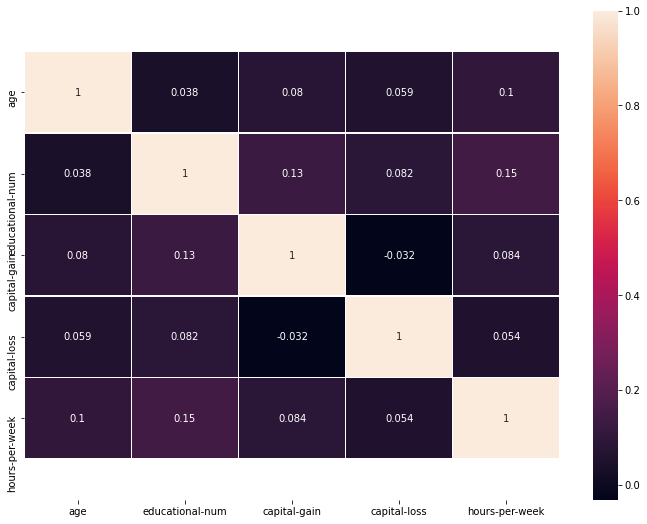

In [59]:
t1=df.corr()
plt.figure(figsize=(12,9))
ax = sb.heatmap(t1,linewidths=.5,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Observation from above heatmap :-
 * There is no strong correlation among the numeric attributes.
 * There is neither strong positive nor strong negative correlation present in any variable .
 * There is correlation present between capital gain and hours-per-week with value 0.084 .

# Conclusion of EDA :
 * Females have more flexible working hours per week in the income groups who earns <=50k. Whereas Males have more flexible working hours per week in the income groups who earns >50k.
 *  Generally Individual's can be seen working for 30 hours to 40 hours per week. 
 * Income group of Individuals who earns >50k have flexible working hours.
 * Educational-num attribute is affecting the target
 * Captial Gain and Capital Loss attribute have most of the  outliers.
 * Workclass and Occupation attribute have more no. of missing value that has been treated above by droping them as there were less no. of rows containing missing value in the whole dataset. So the Dataset is not affected by it.
 * For some of the Individuals the workclass and occuption attribute variable is missing and they are from United states. 

## - Encoding categorical features :-

In [60]:
cat = df.select_dtypes(include=['object'])

In [61]:
cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


***
**- Using `OneHotEncoder` each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.**
***

In [62]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_df = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))

In [63]:
cat_df

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## - Standardizing numerical data :-

In [64]:
num = df.select_dtypes(include=['int64'])

In [65]:
num

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


***
* **Using `StandardScaler` it Standardize features by removing the mean and scaling to unit variance**
***

In [66]:
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)

In [67]:
num_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [68]:
new_df = pd.concat([num_df, cat_df], axis=1)

***
* **We are concatenating both the dataframe using Pandas function `concat()`.**
***

In [69]:
new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## - Train Test Split :-

In [70]:
# X = new_df.drop('income_>50K',axis=1)
Y = new_df.pop('income_>50K')
X = new_df

***
* **`train_test_split` is a function in `Sklearn` model selection for splitting data arrays into two subsets: for training data and for testing data.**
***

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=25)

***
* **Here we are taking 70% of data for training and 30% data for testing.**
* **`random_state` just fix the randomness of data state which will not change.**
***

## - Train the model on Training Data :-

In [72]:
lr = LogisticRegression( max_iter=250)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=250)

## - Prediction on Test Data :-

In [73]:
y_predict = lr.predict(X_test)
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

## - Model evaluation :-

In [74]:
# Accuracy classification score.
accuracy_score(y_test, y_predict)

0.8497825606250461

***
* **The `Accuracy Score` of the model is 84.97 %**
***

In [75]:
confusion_matrix(y_test, y_predict)

array([[9475,  685],
       [1353, 2054]], dtype=int64)

***
* **A `Confusion matrix` is an N x N matrix used for evaluating the performance of a classification mode. For binary classification problem [ [TP, FP], [FN, TN] ].**
* **where;** 
    - **TP** - True Positive 
    - **TN** - True Negative
    - **FP** - False Positive
    - **FN** - False Negative
***

In [76]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



***
* **A `Classification report` is used to measure the quality of predictions from a classification algorithm.**
***

## - Using `RFE` to extract the best features and applying `Logistic Regression` on best features:-
* The `Recursive Feature Elimination` (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
* It uses accuracy metric to `rank` the feature according to their importance. 

In [77]:
from sklearn.feature_selection import RFE
lr_temp = LogisticRegression( max_iter=250)
## No. of features taking = 30
rfe = RFE(lr_temp, 30)
rfe = rfe.fit(X_train, y_train)
rfe

c:\users\shashank\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RFE(estimator=LogisticRegression(max_iter=250), n_features_to_select=30)

***
* **Now we are taking best features and creating a `DataFrame` of them.**
***

In [78]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,11
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,37
4,hours-per-week,False,12
...,...,...,...
90,native-country_Thailand,False,35
91,native-country_Trinadad&Tobago,False,49
92,native-country_United-States,False,32
93,native-country_Vietnam,True,1


In [79]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'workclass_Without-pay',
       'education_1st-4th', 'education_5th-6th', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)',
       'native-country_Peru', 'native-country_Scotland',
       'native-country_South', 'native-country_Vietnam'],
      dtype='object')

In [80]:
X_train_new = X_train[imp_col]
X_train_new

,educational-num,capital-gain,workclass_Without-pay,education_1st-4th,education_5th-6th,education_Prof-school,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_El-Salvador,native-country_India,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Scotland,native-country_South,native-country_Vietnam
21220,-1.613277,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8492,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,1.128753,0.166868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34307,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26767,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.912190,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24894,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying the best feature we will Train the model on Training Data

In [81]:
lrn = LogisticRegression(max_iter=250)
lrn.fit(X_train_new, y_train)

LogisticRegression(max_iter=250)

### Predicting the Model

In [82]:
y_predict_new = lrn.predict(X_train_new)
y_predict_new

array([0., 1., 0., ..., 0., 1., 0.])

In [83]:
accuracy_score(y_test, y_predict)

0.8497825606250461

***
* **Using best features we get 84.97% of accuracy score.**
***

## - Using PCA to extract the best features :-
* PCA is a method used to reduce number of variables in the data by extracting important one from a large data. It reduces the dimension of the data with the aim of retaining as much information as possible.
* n_components : Number of components to keep.
* whiten : Whitening will remove some information from the transformed signal.
* explained_variance_ratio : Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
* np.cumsum : Return the cumulative sum of the elements along a given axis.

***
* **We are Creating a Covariance Matrix and then claculating the Eigenvalues.**
***

In [84]:
pca = PCA(whiten=True)
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.17231214, 0.29928058, 0.41859915, 0.52288518, 0.62121152,
       0.66781356, 0.69754836, 0.72354624, 0.74943991, 0.77017519,
       0.78875128, 0.80669662, 0.8222957 , 0.83642948, 0.84981652,
       0.8613533 , 0.87204272, 0.88250789, 0.89196213, 0.90045472,
       0.9079432 , 0.91518055, 0.92166351, 0.9276611 , 0.93310102,
       0.93814771, 0.94258311, 0.94674013, 0.95079417, 0.95475762,
       0.95861136, 0.96208182, 0.96547486, 0.96881006, 0.9718258 ,
       0.97417841, 0.97648633, 0.97868178, 0.98059593, 0.98226676,
       0.98385806, 0.98536841, 0.98661583, 0.98783116, 0.98894152,
       0.98994237, 0.99067315, 0.99131579, 0.99191365, 0.9924472 ,
       0.99292544, 0.99335723, 0.99375246, 0.99410984, 0.99446161,
       0.99478634, 0.99509617, 0.99538628, 0.99566147, 0.99591763,
       0.99617243, 0.9964134 , 0.99664952, 0.99688091, 0.99710149,
       0.99731476, 0.99752243, 0.99770572, 0.99788872, 0.99805956,
       0.99822186, 0.99837038, 0.99851495, 0.9986505 , 0.99877

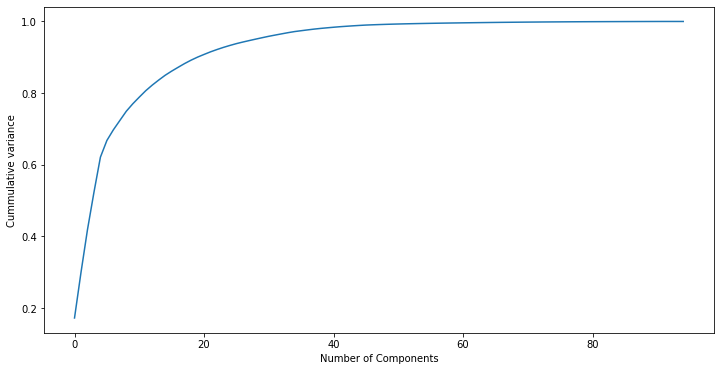

In [85]:
plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

***
**Observation :-**
* Based on the plot above it's clear we should pick 42 features.
***

In [86]:
## Number of components = 42
pca = PCA(n_components=42,whiten=True)
X_PCA = pca.fit_transform(X)

In [87]:
X_PCA

array([[-1.32184844,  0.0805435 ,  0.13034847, ...,  0.07626684,
        -0.23552227, -0.21425277],
       [ 0.14191915, -0.60993306,  0.17576669, ..., -0.51429646,
        -0.2377923 ,  0.21363397],
       [ 0.13880642,  0.74367826, -0.06938524, ...,  0.26629836,
         0.01869548, -0.25635286],
       ...,
       [ 0.14446594, -1.32453457,  0.31385217, ...,  0.18583574,
        -0.00431606,  0.06561732],
       [-1.74087891,  0.6839305 ,  0.02648179, ...,  0.01590616,
        -0.12198488, -0.15938501],
       [ 0.85528542, -0.72330209,  1.41193187, ...,  0.10523658,
         0.32560893, -0.0728414 ]])

## -Train Test Split on the best features :-

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA[:], Y, test_size=.30, random_state=25)

### A. `Logistic Regression` with PCA :

In [89]:
logist = LogisticRegression(max_iter = 250)
logist.fit(x_train,y_train)
##Predicting the test data
y_predict_logistic = logist.predict(x_test)

In [90]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_logistic)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_logistic))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_logistic))

Accuracy score : 0.8502985184639198


Confusion matrix :
[[9497  663]
 [1368 2039]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



### B. `Support Vector Machine` with PCA :

In [91]:
svm = svm.SVC()
svm.fit(x_train,y_train)
##Predicting the test data
y_predict_svm = svm.predict(x_test)

In [92]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_svm)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_svm))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_svm))

Accuracy score : 0.8501511019385273


Confusion matrix :
[[9522  638]
 [1395 2012]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10160
         1.0       0.76      0.59      0.66      3407

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



### C. `KNeighborsClassifier` with PCA :

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
##Predicting the test data
y_predict_knn = knn.predict(x_test)

In [94]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_knn))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.8163190093609494


Confusion matrix :
[[9097 1063]
 [1429 1978]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     10160
         1.0       0.65      0.58      0.61      3407

    accuracy                           0.82     13567
   macro avg       0.76      0.74      0.75     13567
weighted avg       0.81      0.82      0.81     13567



### D. `Decision Tree Classifier` with PCA :

In [95]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
##Predicting the test data
y_predict_dtc = dtc.predict(x_test)

In [96]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_dtc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_dtc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_dtc))

Accuracy score : 0.8029041055502322


Confusion matrix :
[[8910 1250]
 [1424 1983]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10160
         1.0       0.61      0.58      0.60      3407

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567



### E. `Random Forest Classifier` with PCA :

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
## Prediction the test data
y_predict_rfc = rfc.predict(x_test)

In [98]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_rfc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_rfc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_rfc))

Accuracy score : 0.8418220682538513


Confusion matrix :
[[9353  807]
 [1339 2068]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10160
         1.0       0.72      0.61      0.66      3407

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.84      0.84     13567



***
## - Observation :-
* We can conclude that for `Logistic Regression` have highest `Accuracy Score` i.e. 85.02 %. It fits are model best with `PCA`.

* On the other hand `SVM` accuracy score is very much near to `Logistic Regression` i.e. 85.01 % (for `SVM`).

* For `RandomForestClassifier` the accuracy score is 84.13 %.

* For `KNeighborsClassifier` the accuracy score is 81.59 %. 

* For `DecisionTreeClassifier` the accuracy score is 80.22 %. with is less then other models.
***

## - We can also use `KFold` by spliting the data into 4 part and applying each part in model.
* **`KFold` : Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). It generally results in a less biased model compare to other methods.**
* **`cross_val_score` : Returns score of each test folds.**

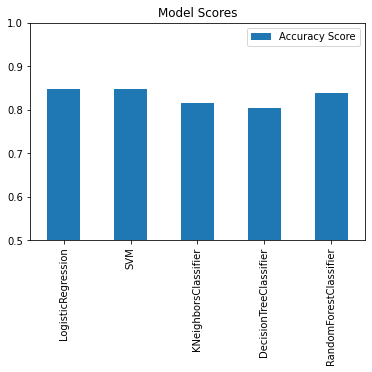

,Accuracy Score
LogisticRegression,0.846513
SVM,0.847950
KNeighborsClassifier,0.815422
DecisionTreeClassifier,0.803127
RandomForestClassifier,0.837645


In [99]:
from sklearn import svm
def lets_try(train,labels):
    results={}
    
    def test_model(model):
        cv = KFold(n_splits=5,shuffle=True,random_state=15)
        predicted = cross_val_score(model, train, Y, cv=cv)
        scores=[predicted.mean()]
        return scores
    
    model = LogisticRegression()
    results["LogisticRegression"]=test_model(model)
    
    model = svm.SVC()
    results["SVM"]=test_model(model)
    
    model = KNeighborsClassifier(n_neighbors=3)
    results['KNeighborsClassifier']=test_model(model)
    
    model = DecisionTreeClassifier()
    results["DecisionTreeClassifier"]=test_model(model)
    
    model = RandomForestClassifier()
    results["RandomForestClassifier"]=test_model(model)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy Score"]
    
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    plt.show()
    
    return results

lets_try(X_PCA[:],Y)

***
## Comparision of Logistic Regression, SVM,  KNeighborsClassifier, Decision Tree and Random Forest Model performance with PCA :
* We can see mostly Accuracy score for `Logistic Regression` and `SVM` is same nearly. 

* `SVM` and `LogisticRegression` are fits model best with the PCA.
* Then `RandomForestClassifier` fits best with 83.% of accuracy score.
* Then `KNeighborsClassifier` with accuracy score of 81.5%.
* At last `DecisionTreeClassifier` with accuracy score of 80.3%.
***